## Import libraries

In [23]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
import cv2
from shutil import copyfile
from PIL import Image

## Read Input

In [24]:
base_dir = "input/rice_plant_lacks_nutrients"

potassium_dir = os.path.join(base_dir, 'Potassium')
nitrogen_dir = os.path.join(base_dir, 'Nitrogen')
phosphorus_dir = os.path.join(base_dir, 'Phosphorus')

potassium_files = os.listdir(potassium_dir)
nitrogen_files =  os.listdir(nitrogen_dir)
phosphorus_files = os.listdir(phosphorus_dir)

print("Potassium images:", len(potassium_files))
print("Nitrogen images:", len(nitrogen_files))
print("Phosporus images:", len(phosphorus_files))

Potassium images: 383
Nitrogen images: 440
Phosporus images: 333


## Create dataset

In [35]:
batch_size = 32
img_height = 360
img_width = 360

In [44]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 1156 files belonging to 3 classes.
Using 925 files for training.


In [45]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 1156 files belonging to 3 classes.
Using 231 files for validation.


In [46]:
class_names = train_ds.class_names
print(class_names)

['Nitrogen', 'Phosphorus', 'Potassium']


## Visualize the input

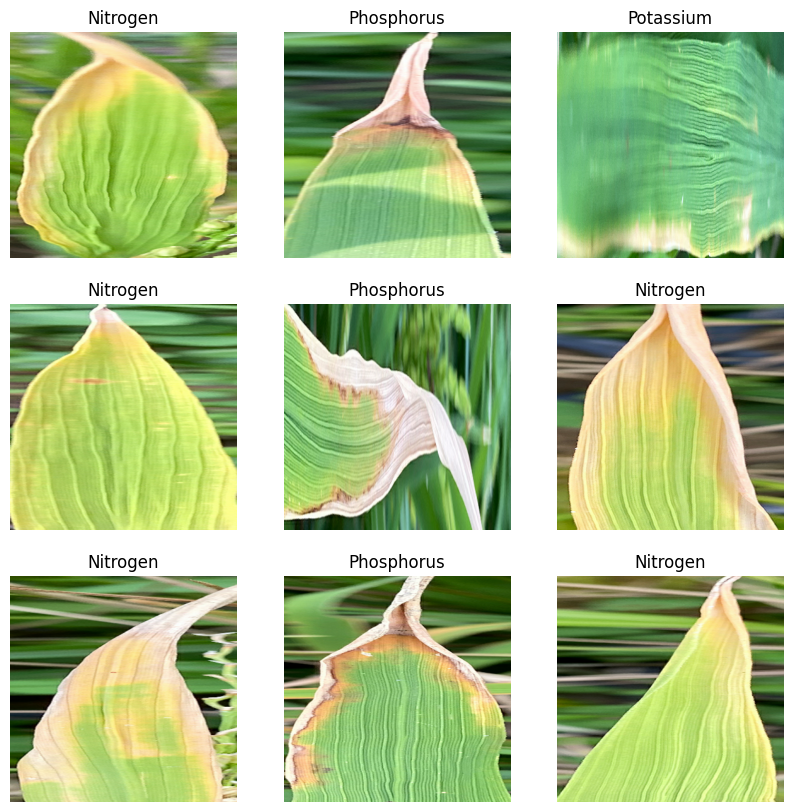

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")